In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# Import libraries for data processing to modelling

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Zwelious/DM_W2/refs/heads/main/adult.csv')
df.sample(n=10)

# Import Dataset
# random 10 rows of the data.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
30132,50,Private,185846,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
10075,39,Private,360494,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
26472,38,Local-gov,200153,Assoc-acdm,12,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
24791,44,Self-emp-not-inc,103111,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
5956,27,Private,203160,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
47627,64,Federal-gov,271550,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,>50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
34095,38,Private,130813,HS-grad,9,Divorced,Machine-op-inspct,Other-relative,White,Female,0,0,40,United-States,<=50K
35667,58,Self-emp-not-inc,130714,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,<=50K
11849,27,Private,110663,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K


In [3]:
df.info()
# displays a concise summary of a DataFrame, including data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
print(df['income'].value_counts(dropna=False))

# Unique values count for categorical column (column "diagnosis")
# B stands for Benign or non-cancerous, while M stands for Malignant (cancerous)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


In [6]:
df.isnull().sum()
# show null in every column

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


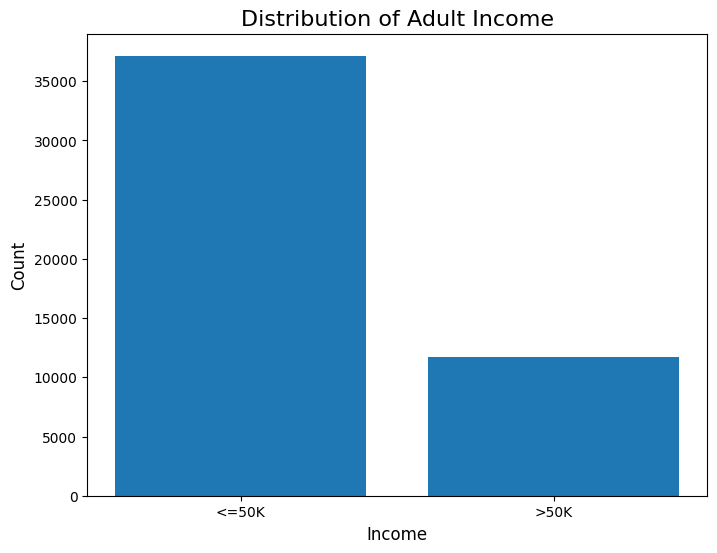

In [7]:
diagnosis_counts = df['income'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values)

plt.title('Distribution of Adult Income', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.xticks([0, 1])

plt.show()
#to show income distribution

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


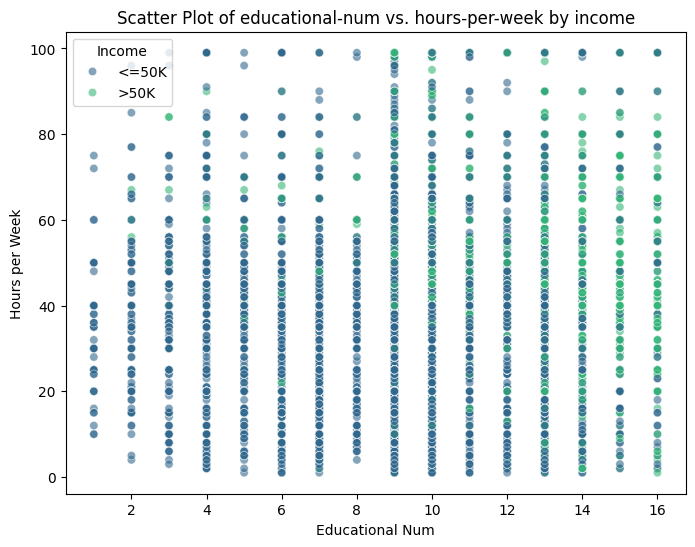

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='educational-num', y='hours-per-week', hue='income', palette='viridis', alpha=0.6)
plt.title('Scatter Plot of educational-num vs. hours-per-week by income')
plt.xlabel('Educational Num')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.show()
#Higher educational levels tend to be associated with a higher likelihood of earning above $50K,
#though working hours per week do not show a strong linear relationship with income level.

In [9]:
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])

df.sample(n = 5)
# to convert categorical data into numerical labels.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
14359,17,4,140117,1,7,4,12,3,4,0,0,0,14,39,<=50K
42123,37,4,146398,9,13,4,10,1,2,0,0,0,40,39,<=50K
34922,59,4,32552,9,13,2,3,0,4,1,0,0,4,39,<=50K
22444,25,4,391192,15,10,4,12,3,4,1,0,0,24,39,<=50K
32974,21,4,186314,11,9,2,1,0,4,1,0,0,40,39,<=50K


In [10]:
df['income'] = label_encoder.fit_transform(df['income'])

df.sample(n = 5)
# Using label encoder to encode the categorical columns (target variable: income)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
26681,19,4,560804,15,10,4,1,3,4,0,0,0,30,39,0
1608,39,4,352188,9,13,4,1,1,4,1,0,0,40,39,0
39163,45,4,155659,9,13,2,10,0,4,1,0,0,60,39,1
7372,20,4,74631,15,10,4,12,2,4,0,0,0,40,39,0
32513,18,4,145005,15,10,4,8,3,4,1,0,0,20,39,0


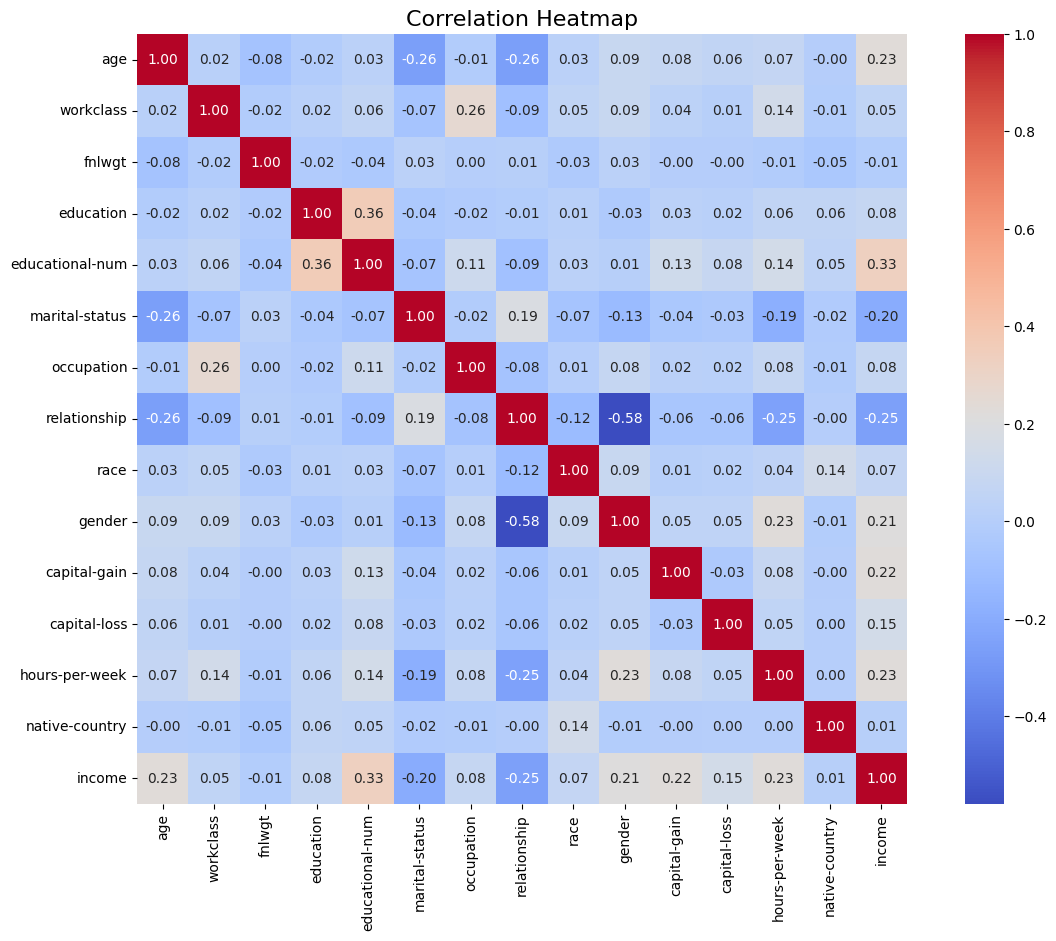

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

#Income is most positively correlated with educational level, age, and capital gain, while it is negatively correlated
#with marital status and relationship, indicating that these factors may have the strongest influence on income levels in the dataset.

In [12]:
X = df.drop(['income', 'fnlwgt', 'native-country'], axis = 1)
y = df['income']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# divide the dataset into 80% train data (for training the model), and 20% testing data.

In [14]:
X_train.shape, X_test.shape
# To verify each train and test data is true to 80-20 division.

((39073, 12), (9769, 12))

In [15]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
y_pred_en = clf_en.predict(X_test)


In [17]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
#accuracy with entropy

Model accuracy score with criterion entropy: 0.8449


In [18]:
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.8449
Training accuracy: 0.8384


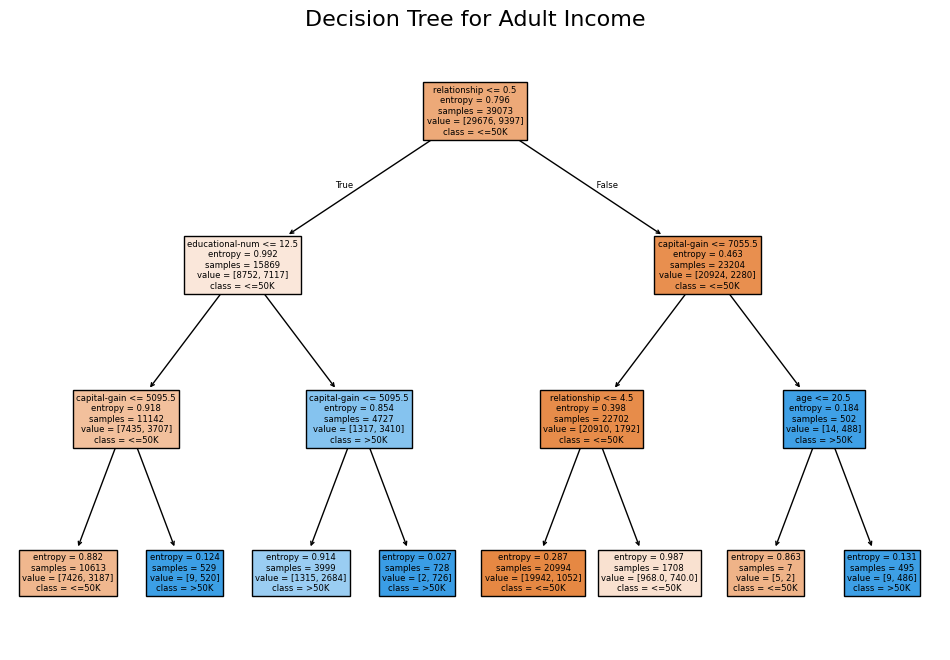

In [19]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=["<=50K", ">50K"], filled=True)
plt.title('Decision Tree for Adult Income', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

In [20]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.


In [22]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
#accuracy with gini

Model accuracy score with criterion gini: 0.8449


In [23]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.8449
Training accuracy: 0.8384


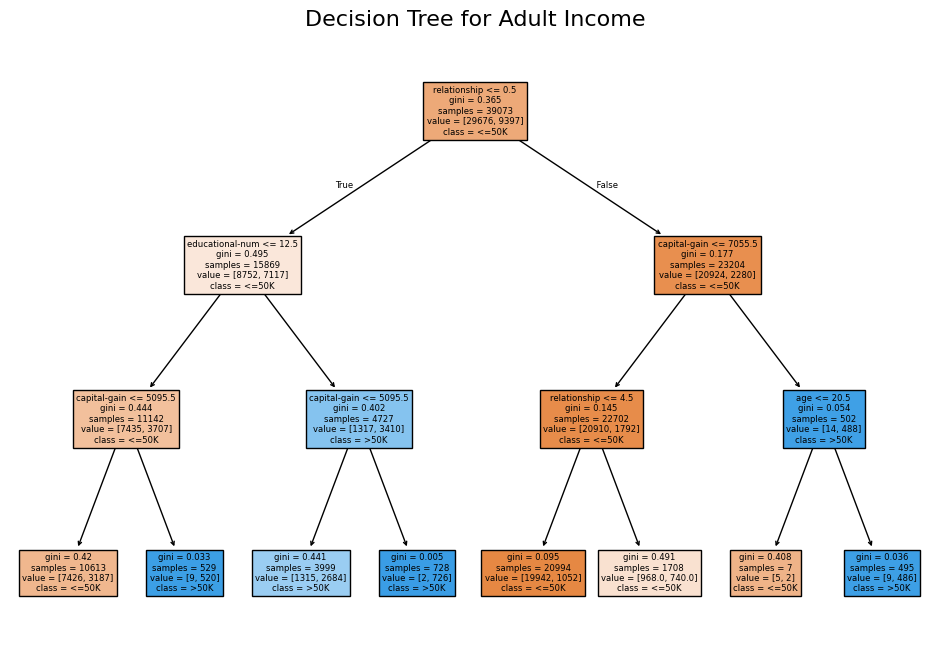

In [24]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['<=50K', '>50K'], filled=True)
plt.title('Decision Tree for Adult Income', fontsize=16)
plt.show()

In [25]:
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Printing the confusion matrix of both Criterion Entropy and Criterion Gini.

Confusion Matrix Entropy:
 [[7136  343]
 [1172 1118]]
Confusion Matrix Gini Index:
 [[7136  343]
 [1172 1118]]


In [29]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [28]:
y_pred_nb = nb.predict(X_test)


In [30]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

Model accuracy score: 0.8053


In [31]:
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.8053
Training accuracy: 0.7996


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

# Modelling and fitting using random forest classifier, with estimators of 100 times.

RandomForestClassifier(random_state=42)

In [33]:

y_pred_rf = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy}')

# Showing the accuracy score based on the y_test and y_pred

Accuracy: 0.8552564233800799


In [34]:
y_train_rf = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_rf)
training_accuracy = accuracy_score(y_train, y_train_rf)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))

Testing accuracy: 0.8553


In [35]:
cm_en = confusion_matrix(y_test, y_pred_en)
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Entropy:")
print(cm_en)
print("\nConfusion Matrix Gini:")
print(cm_gini)
print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)


# Confusion matrix of each models

Confusion Matrix Entropy:
[[7136  343]
 [1172 1118]]

Confusion Matrix Gini:
[[7136  343]
 [1172 1118]]

Confusion Matrix Naive Bayes:
[[7128  351]
 [1551  739]]

Confusion Matrix Random Forest:
[[6882  597]
 [ 817 1473]]


In [36]:
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)
class_report_nb = classification_report(y_test, y_pred_nb)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)
print("Classification Report Naive Bayes: \n", class_report_nb)
print("Classification Report Random Forest: \n", class_report_rf)



Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.68      0.32      0.44      2290

    accuracy                           0.81      9769
   macro avg       0.7

In [ ]:
# The four models achieved similar accuracy, ranging from 80% to 86%. While Random Forest had the highest accuracy overall,
# all models performed better at predicting incomes below $50K. This could be due to an imbalance in the dataset, with more data available
#for individuals earning less than $$50K. This could be due to an imbalance in the dataset, with more data available for individuals earning less than $50K.
# Despite the lower accuracy for higher incomes, Random Forest might be the most reliable in those predictions.